In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pywaffle import Waffle  # pip install pywaffle

%matplotlib inline

In [5]:
dtypes_auc = { "auction_type_id": np.float16, "country": "category", "platform": "category", "ref_type_id": "category", 
               "source_id": "category", "device_id": "category"}

In [6]:
dtypes_clk = { "advertiser_id": np.int8, "action_id": np.float16, "source_id": np.int8, "country_code": "category", 
               "latitude": np.float16, "longitude": np.float16, "wifi_connection": "category", "carrier_id": np.float16,
               "trans_id": "object", "os_major":np.float32, "brand": np.float16, "touchX": np.float16,
               "touchY": np.float16  }

In [7]:
auctions = pd.read_csv('data/auctions.csv.gzip', compression = 'gzip', low_memory = False, dtype=dtypes_auc)
installs = pd.read_csv('data/installs.csv.gzip', compression = 'gzip')
events = pd.read_csv('data/events.csv.gzip', compression='gzip', low_memory = False)
clicks = pd.read_csv('data/clicks.csv.gzip', compression = 'gzip', low_memory = False, dtype=dtypes_clk)

### Se van a eliminar algunas columnas que no continen datos relevantes

In [5]:
auct = auctions[['country', 'date', 'device_id', 'platform', 'ref_type_id', 'source_id']]
inst = installs[['created', 'application_id', 'ref_type', 'ref_hash', 'implicit', 'device_model', 'session_user_agent', 'user_agent', \
                 'wifi', 'ip_address', 'device_language','device_countrycode']]
evnt = events.drop(['trans_id', 'device_countrycode'], axis = 'columns')
clk = clicks.drop(['action_id', 'agent_device', 'brand'], axis = 'columns')

installs -> user_agent y wifi son 1/2 null
events -> device_os_version, device_brand, device_city, user_agent, carrier, device_os, wifi y connection_type tienen muchos null

In [6]:
auct.head(1).T

,0
country,6333597102633388268
date,2019-03-11 14:18:33.290763
device_id,6059599345986491085
platform,1
ref_type_id,1
source_id,0


In [7]:
inst.head(1).T

,0
created,2019-03-13 01:43:33.445
application_id,0
ref_type,1891515180541284343
ref_hash,8464844987297247076
implicit,False
device_model,4.44525e+18
session_user_agent,NaN
user_agent,NaN
wifi,NaN
ip_address,5529284367937637301


In [8]:
evnt.head(1).T

,0
date,2019-03-05 00:09:36.966
event_id,0
ref_type,1891515180541284343
ref_hash,2688759737656491380
application_id,38
attributed,False
device_os_version,5.9087e+17
device_brand,NaN
device_model,5.99012e+18
device_city,3.25822e+18


In [9]:
clk.head(1).T

,0
advertiser_id,2
source_id,4
created,2019-03-06T22:42:12.755Z
country_code,6333597102633388268
latitude,1.20605
longitude,1.07031
wifi_connection,False
carrier_id,1
trans_id,iGgClCM9exiHF4K31g94XmvHEBSLKIY
os_minor,6.76814e+18


In [8]:
events['date'] = pd.to_datetime(events['date'])
installs['created'] = pd.to_datetime(installs['created'])
auctions['date'] = pd.to_datetime(auctions['date'])
clicks['created'] = pd.to_datetime(clicks['created'])

In [11]:
events['hour'] = events['date'].dt.hour
installs['hour'] = installs['created'].dt.hour
auctions['hour'] = auctions['date'].dt.hour
clicks['hour'] = clicks['created'].dt.hour

In [10]:
events['day'] = events['date'].dt.day
installs['day'] = installs['created'].dt.day
auctions['day'] = auctions['date'].dt.day
clicks['day'] = clicks['created'].dt.day

In [9]:
events['day_of_week'] = events['date'].dt.dayofweek
installs['day_of_week'] = installs['created'].dt.dayofweek
auctions['day_of_week'] = auctions['date'].dt.dayofweek
clicks['day_of_week'] = clicks['created'].dt.dayofweek

## 1 - Comparacion events, installs, clicks y auctions por hora

In [12]:
evnt_hora = events.groupby('hour').agg({'hour':'count'})

In [13]:
evnt_hora.columns = ['count_events']

In [14]:
inst_hora = installs.groupby('hour').agg({'hour':'count'})

In [15]:
inst_hora.columns = ['count_installs']

In [16]:
clk_hora = clicks.groupby('hour').agg({'hour':'count'})

In [17]:
clk_hora.columns = ['count_clicks']

In [18]:
auct_hora = auctions.groupby('hour').agg({'hour':'count'})

In [19]:
auct_hora.columns = ['count_auctions']

In [20]:
merged1 = evnt_hora.join(inst_hora, on = 'hour')

In [21]:
merged1 = merged1.join(clk_hora, on = 'hour')

In [22]:
merged1 = merged1.join(auct_hora, on = 'hour')

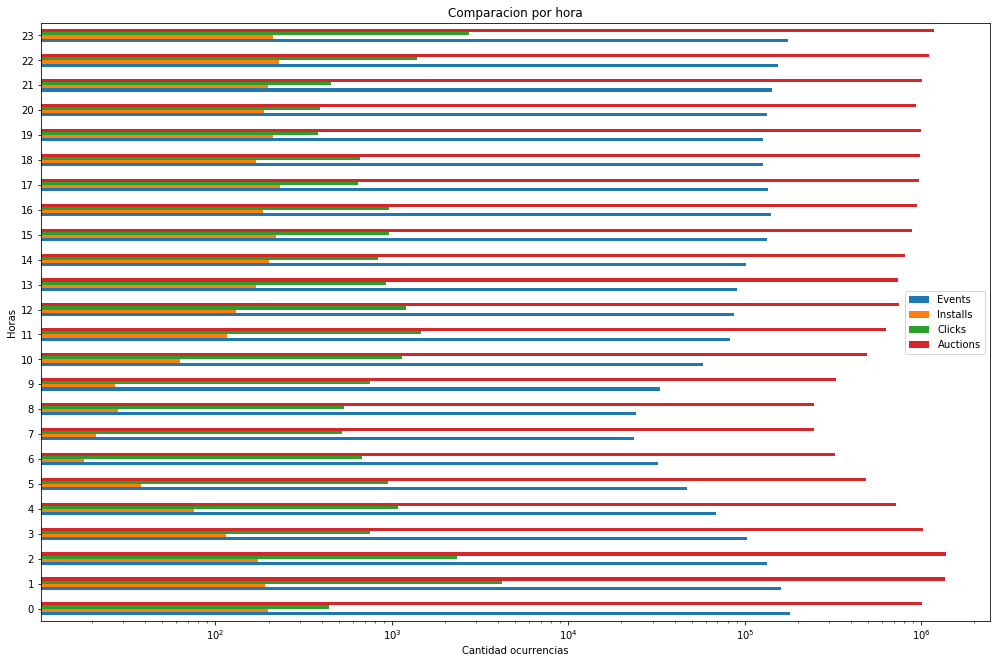

In [23]:
grph1 = merged1.plot.barh(figsize = (17,11), rot = 0, title = 'Comparacion por hora')
grph1.set_ylabel('Horas')
grph1.set_xlabel('Cantidad ocurrencias')
grph1.set_xscale('log')
grph1.legend(["Events", "Installs", "Clicks", "Auctions"]);

In [24]:
merged2 = merged1.loc[[4,5,6,7,8,9,10,11]]

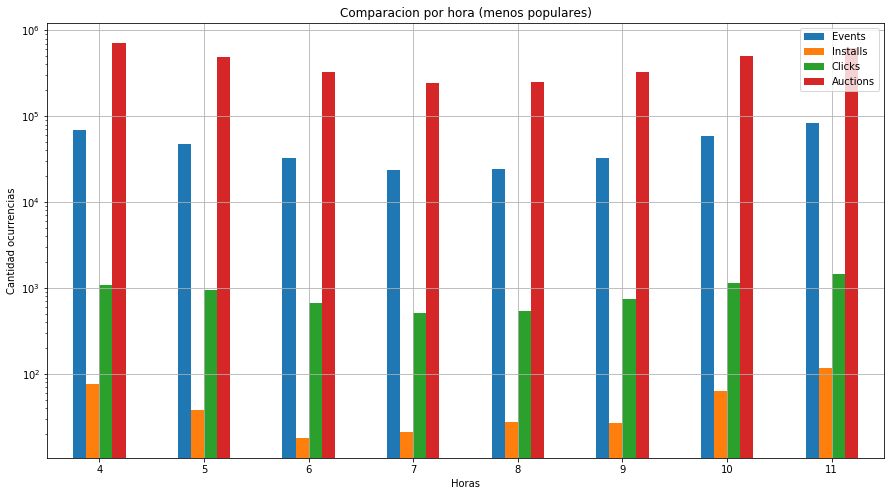

In [61]:
grph2 = merged2.plot.bar(figsize = (15,8), rot = 0, title = 'Comparacion por hora (menos populares)', grid = True)
grph2.set_ylabel('Cantidad ocurrencias')
grph2.set_xlabel('Horas')
grph2.set_yscale('log')
grph2.legend(["Events", "Installs", "Clicks", "Auctions"]);

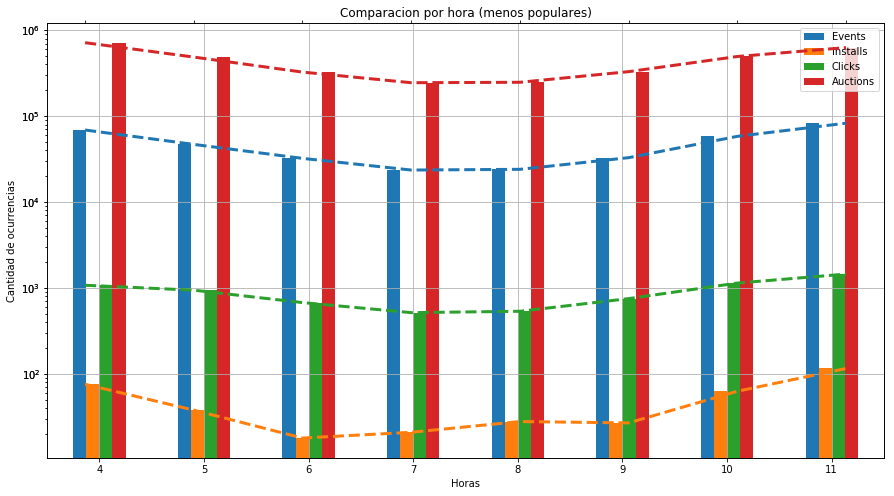

In [62]:
fig, ax = plt.subplots()
ax2 = ax.twiny()
merged2.plot(kind='bar', ax=ax, figsize = (15,8), rot = 0, title = 'Comparacion por hora (menos populares)', grid =True)
merged2.plot(kind='line',ax=ax2,linewidth = 3, style = '--', legend = False)
ax2.xaxis.get_major_formatter().set_useOffset(False)
ax2.set_xticklabels([])
ax2.set_xlabel('')
ax.set_yscale('log')
ax.set_xlabel('Horas')
ax.set_ylabel('Cantidad de ocurrencias')
ax.legend(["Events", "Installs", "Clicks", "Auctions"])
plt.show()

## 2. Relacion click-install

#### Pregunta: ¿De los usuarios que hicieron click, cuantos instalaron la aplicacion?

In [27]:
#installs = pd.read_csv('data/installs.csv.gzip', compression = 'gzip')
#clicks = pd.read_csv('data/clicks.csv.gzip', compression = 'gzip', low_memory = False, dtype=dtypes_clk)

In [28]:
#inst = installs[['created', 'application_id', 'ref_type', 'ref_hash', 'implicit', 'device_model', 'session_user_agent', 'user_agent', \
#                 'wifi', 'ip_address', 'device_language']]
#clk = clicks.drop(['action_id', 'agent_device', 'brand'], axis = 'columns')

#Use esto para no volver a importar todo

In [29]:
clkcount = clk.groupby('ref_hash').agg({'ref_hash' : 'count'})

In [30]:
len(clkcount)

17119

In [31]:
clkcount = clkcount.rename(columns={'ref_hash':'cant_clicks'}).reset_index()

In [32]:
clkcount.sort_values('cant_clicks', ascending = False).head()

,ref_hash,cant_clicks
7487,4063522808706112974,41
12676,6841615430383729819,32
2374,1244272413279716745,26
2794,1486699123421703687,21
1687,871778630200697460,21


In [33]:
instcount = inst.groupby('ref_hash').agg({'ref_hash' : 'count'})

In [34]:
instcount = instcount.rename(columns={'ref_hash':'cant_installs'}).reset_index()

In [35]:
merged_cl_in = instcount.merge(clkcount, on = 'ref_hash', how = 'left')

In [36]:
merged_cl_in['cant_clicks'].isna().sum()

3001

In [37]:
merged_cl_in = merged_cl_in.dropna()
merged_cl_in

,ref_hash,cant_installs,cant_clicks
192,582930240149217282,1,4.0
422,1254317779988816837,1,1.0
793,2369915544093215150,1,1.0
1209,3685364020547088390,1,1.0
2355,7190737170444985036,1,1.0
2532,7759178785240189555,1,2.0
2666,8187571300120427764,1,1.0


In [38]:
len(merged_cl_in)

7

### Se ve entonces que de un numero tan elevado de clicks unicos (17119 usuarios diferentes) tan solo 7 de ellos instalaron la aplicacion que se publicita.

#### Es ademas notorio que ninguno de ellos hizo una gran cantidad de clicks en las publicidades, por lo menos en comparacion los usuarios que hicieron clicks mas veces.

## La idea que sigue era restringir los dataframes por pais, pero nos encontramos con lo siguiente

In [39]:
clkcount2 = clk.groupby(['ref_hash','country_code']).agg({'ref_hash' : 'count'})

In [40]:
clkcount2 = clkcount2.rename(columns={'ref_hash':'cant_clicks'}).reset_index()

In [41]:
instcount2 = inst.groupby(['ref_hash','device_countrycode']).agg({'ref_hash' : 'count'})

In [42]:
instcount2 = instcount2.rename(columns={'ref_hash':'cant_installs'}).reset_index()

In [43]:
merged_cl_in2 = instcount2.merge(clkcount2, on = 'ref_hash', how = 'left')

In [44]:
merged_cl_in2['cant_clicks'].isna().sum()

3004

In [45]:
merged_cl_in2 = merged_cl_in2.dropna()
merged_cl_in2

,ref_hash,device_countrycode,cant_installs,country_code,cant_clicks
193,582930240149217282,2970470518450881158,1,6333597102633388268,4.0
423,1254317779988816837,2970470518450881158,1,6333597102633388268,1.0
795,2369915544093215150,2970470518450881158,1,6333597102633388268,1.0
1211,3685364020547088390,2970470518450881158,1,6333597102633388268,1.0
2357,7190737170444985036,2970470518450881158,1,6333597102633388268,1.0
2534,7759178785240189555,2970470518450881158,1,6333597102633388268,2.0
2668,8187571300120427764,2970470518450881158,1,6333597102633388268,1.0


In [46]:
clicks['country_code'].value_counts()

6333597102633388268    26351
Name: country_code, dtype: int64

In [47]:
installs['device_countrycode'].value_counts()

6333597102633388268    1820
2970470518450881158    1592
Name: device_countrycode, dtype: int64

### Es muy raro el resultado, no se me ocurre una explicacion logica para que el pais sea diferente en clicks e installs

## 3. Tiempo entre que alguien instala una aplicación y realiza un event

In [48]:
inst['created'] = pd.to_datetime(inst['created'])
inst_3 = inst
inst_3['cantidad_de_installs'] = 1
inst_3 = inst_3.groupby(['ref_hash','application_id'])
inst_3 = inst_3['created','cantidad_de_installs'].agg({'created':'min','cantidad_de_installs':'count'})
inst_3 = inst_3.reset_index()
inst_3.head()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,ref_hash,application_id,created,cantidad_de_installs
0,4958526679100225,10,2019-03-09 15:24:03.123,1
1,5610335643679608,7,2019-03-08 23:56:00.134,1
2,12589600065022004,8,2019-03-11 03:01:40.186,1
3,13755514797422075,7,2019-03-11 22:13:03.705,1
4,14817751128061288,7,2019-03-13 02:43:14.119,1


In [49]:
evnt['date'] = pd.to_datetime(evnt['date'])
evnt_3 = evnt
evnt_3['cantidad_de_events'] = 1
evnt_3 = evnt_3.groupby(['ref_hash','application_id'])
evnt_3 = evnt_3['date','cantidad_de_events'].agg({'date':'min','cantidad_de_events':'count'})
evnt_3 = evnt_3.reset_index()
evnt_3.head()

,ref_hash,application_id,date,cantidad_de_events
0,163367509015039,66,2019-03-05 14:38:17.976,1
1,264819082914115,64,2019-03-13 02:30:24.861,2
2,400199180093841,212,2019-03-12 10:38:20.430,1
3,473597089501983,64,2019-03-13 11:37:00.700,4
4,533598976671757,64,2019-03-08 01:21:48.694,30


In [50]:
merged_3 = inst_3.merge(evnt_3, on=['ref_hash','application_id'])
merged_3.head()

,ref_hash,application_id,created,cantidad_de_installs,date,cantidad_de_events
0,4958526679100225,10,2019-03-09 15:24:03.123,1,2019-03-09 15:24:07.212,6
1,12589600065022004,8,2019-03-11 03:01:40.186,1,2019-03-11 03:01:40.186,85
2,14817751128061288,7,2019-03-13 02:43:14.119,1,2019-03-13 02:43:18.410,2
3,17437441331211593,16,2019-03-08 23:13:00.326,2,2019-03-08 23:13:00.326,1
4,19615030838209300,7,2019-03-10 19:36:47.718,1,2019-03-10 19:36:56.233,2


In [51]:
merged_3['date'] = pd.to_datetime(merged_3['date'])
merged_3['created'] = pd.to_datetime(merged_3['created'])

In [65]:
merged_3 ['diferencia'] = (merged_3['date'] - merged_3['created']).dt.total_seconds()
merged_3 = merged_3[merged_3['diferencia'] >= 0]
merged_3.head()

,ref_hash,application_id,created,cantidad_de_installs,date,cantidad_de_events,diferencia
0,4958526679100225,10,2019-03-09 15:24:03.123,1,2019-03-09 15:24:07.212,6,4.089
1,12589600065022004,8,2019-03-11 03:01:40.186,1,2019-03-11 03:01:40.186,85,0.000
2,14817751128061288,7,2019-03-13 02:43:14.119,1,2019-03-13 02:43:18.410,2,4.291
3,17437441331211593,16,2019-03-08 23:13:00.326,2,2019-03-08 23:13:00.326,1,0.000
4,19615030838209300,7,2019-03-10 19:36:47.718,1,2019-03-10 19:36:56.233,2,8.515


### Las fechas son las atribuidas a la primera instalación y a el primer evento

In [87]:
mergeado_hist1 = merged_3[merged_3['diferencia']<3600]
mergeado_hist2 = merged_3[merged_3['diferencia']<20]

mergeado_hist1 = mergeado_hist1['diferencia']
mergeado_hist2 = mergeado_hist2['diferencia']

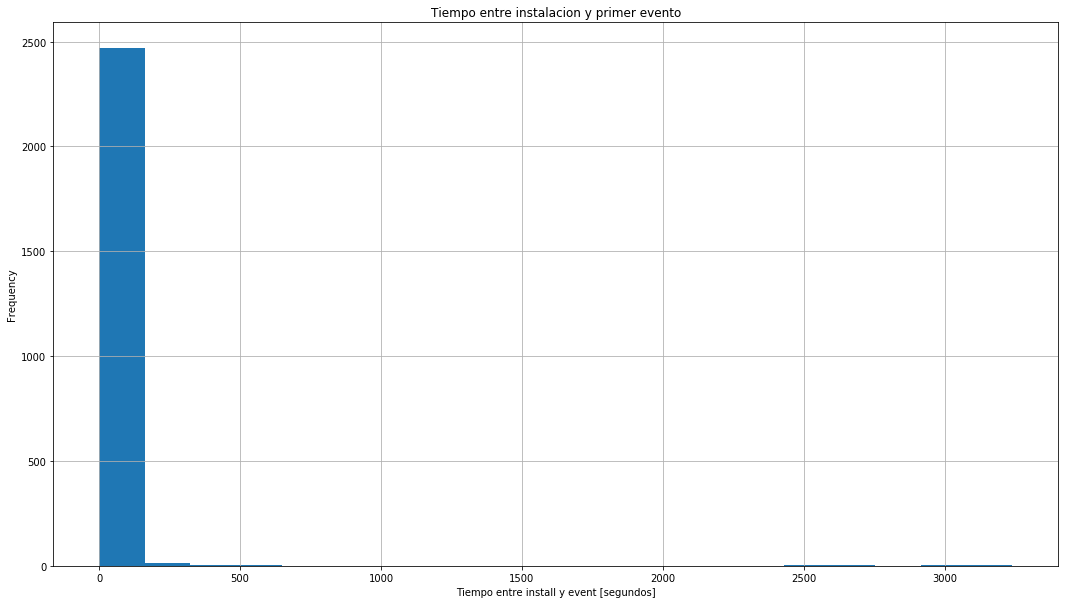

In [59]:
grph3 = mergeado_hist1.plot.hist(figsize = (18,10), bins = 20, grid = True, title = 'Tiempo entre instalacion y primer evento')
grph3.set_xlabel('Tiempo entre install y event [segundos]');

### Se puede observar que en la primera hora, la mayor cantidad de events luego de una instalación surgen en los primeros segundos, por lo tanto fue necesario hacer otro histograma.

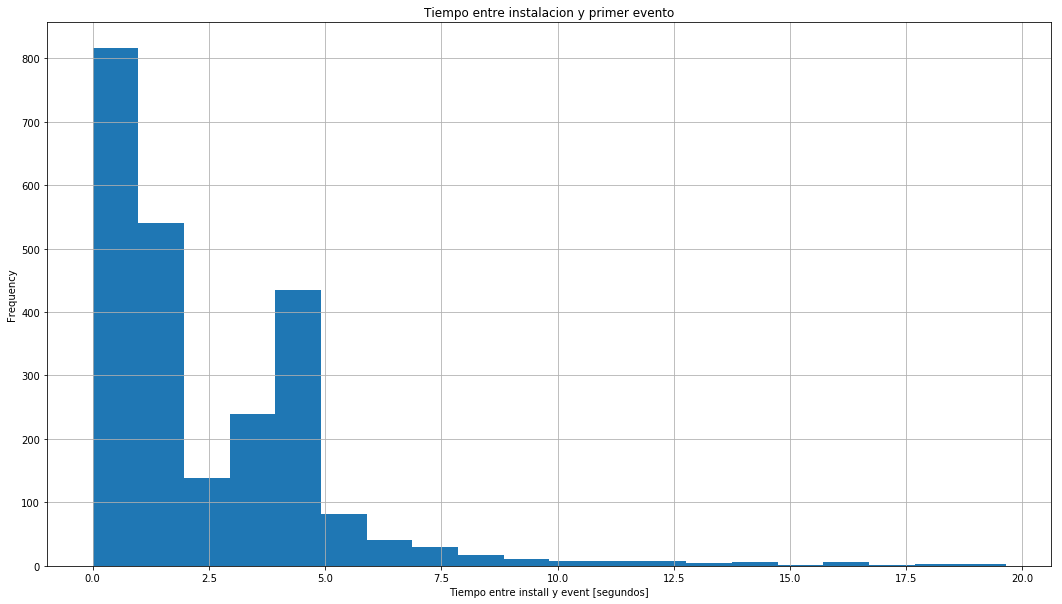

In [60]:
grph3_2 = mergeado_hist2.plot.hist(figsize = (18,10), bins = 20, grid = True, title = 'Tiempo entre instalacion y primer evento')
grph3_2.set_xlabel('Tiempo entre install y event [segundos]');

## 4 - Comparacion auctions, clicks, events e installs por dia de la semana

In [134]:
auctions_dow = auctions.groupby(['day_of_week', 'day']).agg({'day_of_week':'count'})
clicks_dow = clicks.groupby(['day_of_week', 'day']).agg({'day_of_week':'count'})
events_dow = events.groupby(['day_of_week', 'day']).agg({'day_of_week':'count'})
installs_dow = installs.groupby(['day_of_week', 'day']).agg({'day_of_week':'count'})

In [135]:
auctions_dow.columns = ['count_auctions']
clicks_dow.columns = ['count_clicks']
events_dow.columns = ['count_events']
installs_dow.columns = ['count_installs']

In [136]:
clicks_dow

count_clicks
day_of_week day              
0           11           4557
1           5              31
            12           5204
2           6              14
            13           3468
3           7            2989
4           8            2839
5           9            3283
6           10           3966

Vamos a descartar los dias 5 y 6 debido a sus valores anormalmente bajos

In [137]:
clicks_dow = clicks_dow.loc[[(0,11),(1,12),(2,13),(3,7),(4,8),(5,9),(6,10)]]
clicks_dow

,,count_clicks
day_of_week,day,
0,11,4557
1,12,5204
2,13,3468
3,7,2989
4,8,2839
5,9,3283
6,10,3966


Para el resto hacemos un promedio de los dias de la sema que esta repetidos

In [138]:
auctions_dow = auctions_dow.groupby(['day_of_week']).agg({'count_auctions':'mean'})
clicks_dow = clicks_dow.groupby(['day_of_week']).agg({'count_clicks':'mean'})
events_dow = events_dow.groupby(['day_of_week']).agg({'count_events':'mean'})
installs_dow = installs_dow.groupby(['day_of_week']).agg({'count_installs':'mean'})

In [139]:
merged4 = auctions_dow.join(clicks_dow, on = 'day_of_week')

In [140]:
merged4 = merged4.join(events_dow, on = 'day_of_week')

In [141]:
merged4 = merged4.join(installs_dow, on = 'day_of_week')
merged4

,count_auctions,count_clicks,count_events,count_installs
day_of_week,,,,
0,2574916.0,4557,268884,377.0
1,1981155.5,5204,268607,404.5
2,1985671.5,3468,284886,374.0
3,2047661.0,2989,253706,393.0
4,2303002.0,2839,285535,366.0
5,2074552.0,3283,286221,368.0
6,2637534.0,3966,293091,351.0


In [142]:
auctions_dow['alias'] = ['Lunes','Martes','Miercoles','Jueves','Viernes','Sabado','Domingo']
clicks_dow['alias'] = ['Lunes','Martes','Miercoles','Jueves','Viernes','Sabado','Domingo']
events_dow['alias'] = ['Lunes','Martes','Miercoles','Jueves','Viernes','Sabado','Domingo']
installs_dow['alias'] = ['Lunes','Martes','Miercoles','Jueves','Viernes','Sabado','Domingo']

In [143]:
auctions_dow.set_index('alias', drop =True, inplace = True)
clicks_dow.set_index('alias', drop =True, inplace = True)
events_dow.set_index('alias', drop =True, inplace = True)
installs_dow.set_index('alias', drop =True, inplace = True)

In [144]:
auctions_dow.reset_index(inplace = True)
clicks_dow.reset_index(inplace = True)
events_dow.reset_index(inplace = True)
installs_dow.reset_index(inplace = True)

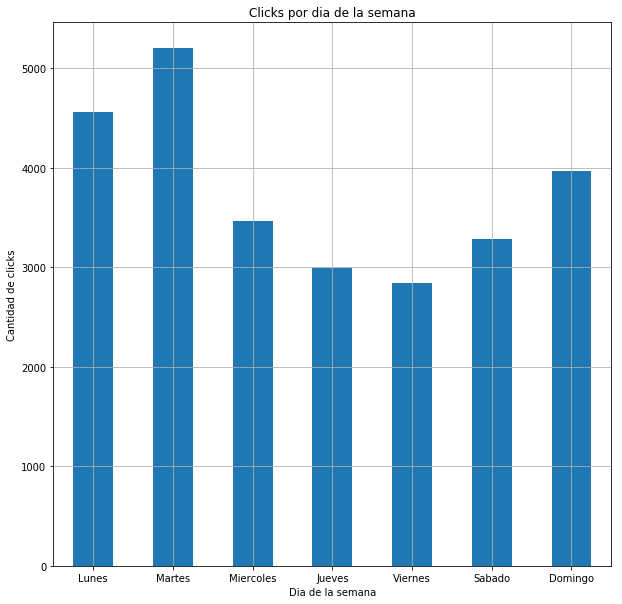

In [145]:
grph4_1 = clicks_dow.plot.bar( x = 'alias', figsize = (10,10), grid = True, rot = 0, legend = False , title = 'Clicks por dia de la semana')
grph4_1.set_ylabel("Cantidad de clicks")
grph4_1.set_xlabel("Dia de la semana");

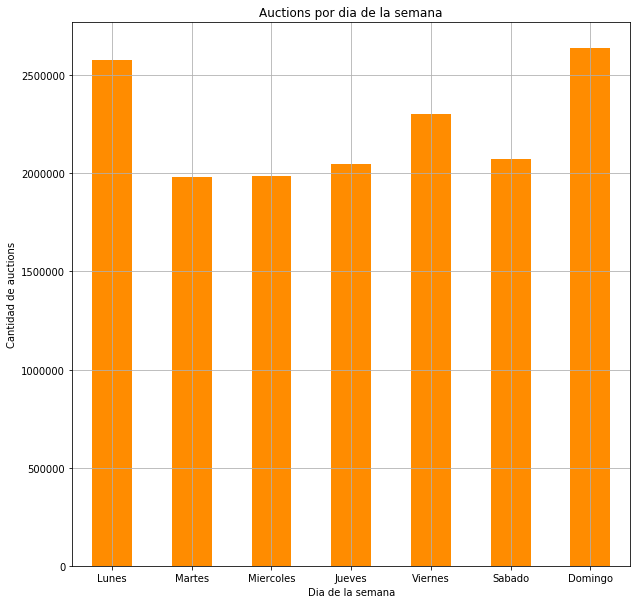

In [154]:
grph4_2 = auctions_dow.plot.bar( x = 'alias', color = 'darkorange', figsize = (10,10), grid = True, rot = 0, legend = False , title = 'Auctions por dia de la semana')
grph4_2.set_ylabel("Cantidad de auctions")
grph4_2.set_xlabel("Dia de la semana");

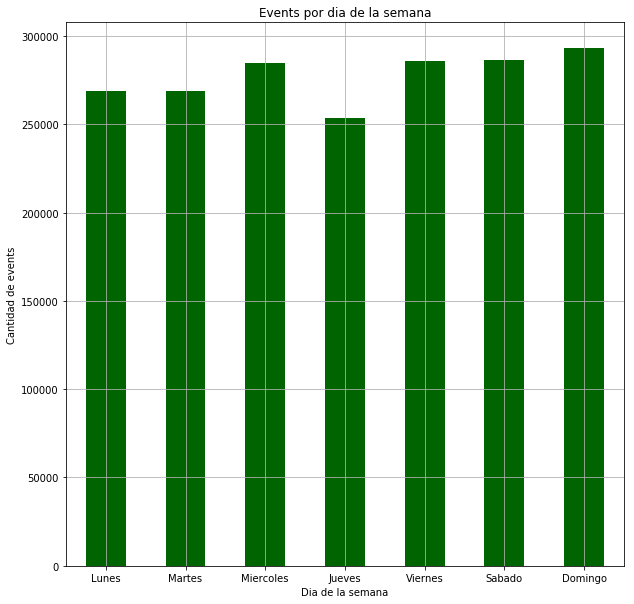

In [156]:
grph4_3 = events_dow.plot.bar( x = 'alias', color='darkgreen', figsize = (10,10), grid = True, rot = 0, legend = False , title = 'Events por dia de la semana')
grph4_3.set_ylabel("Cantidad de events")
grph4_3.set_xlabel("Dia de la semana");

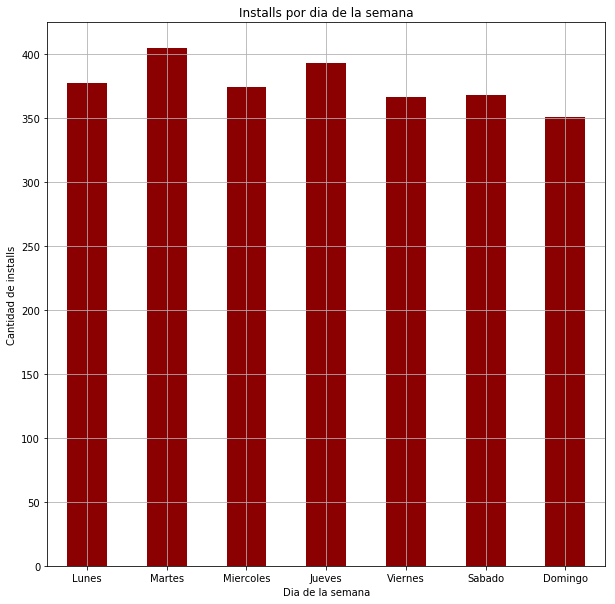

In [157]:
grph4_4 = installs_dow.plot.bar( x = 'alias', color = 'darkred', figsize = (10,10), grid = True, rot = 0, legend = False , title = 'Installs por dia de la semana')
grph4_4.set_ylabel("Cantidad de installs")
grph4_4.set_xlabel("Dia de la semana");

In [151]:
merged4['alias'] = ['Lunes','Martes','Miercoles','Jueves','Viernes','Sabado','Domingo']
merged4.set_index('alias', drop =True, inplace = True)

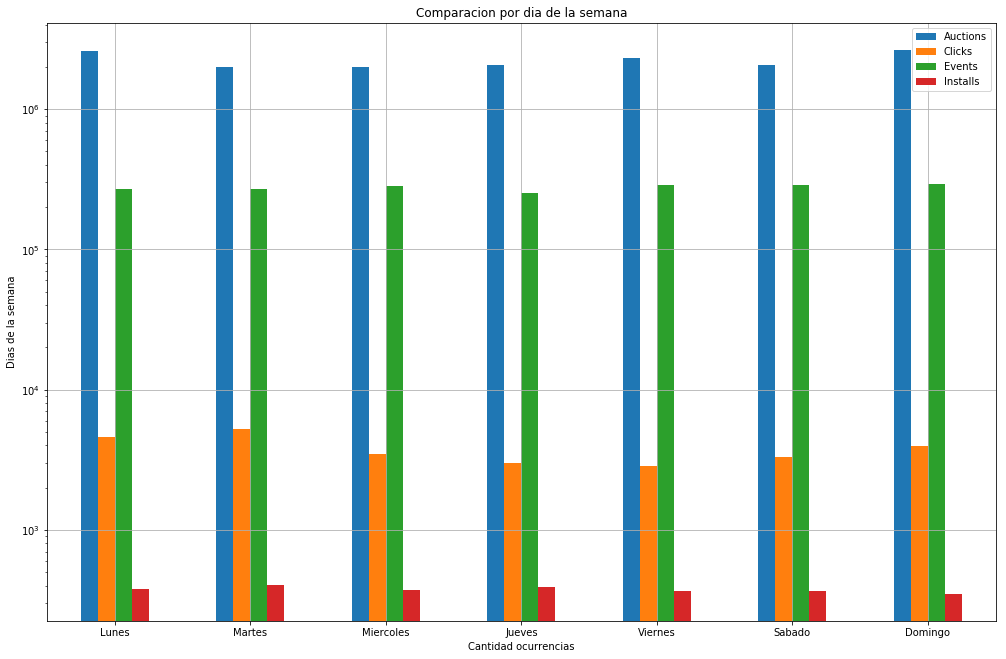

In [158]:
grph4 = merged4.plot.bar(figsize = (17,11), rot = 0, title = 'Comparacion por dia de la semana', grid = True)
grph4.set_ylabel('Dias de la semana')
grph4.set_xlabel('Cantidad ocurrencias')
grph4.set_yscale('log')
grph4.legend(["Auctions", "Clicks", "Events", "Installs"]);

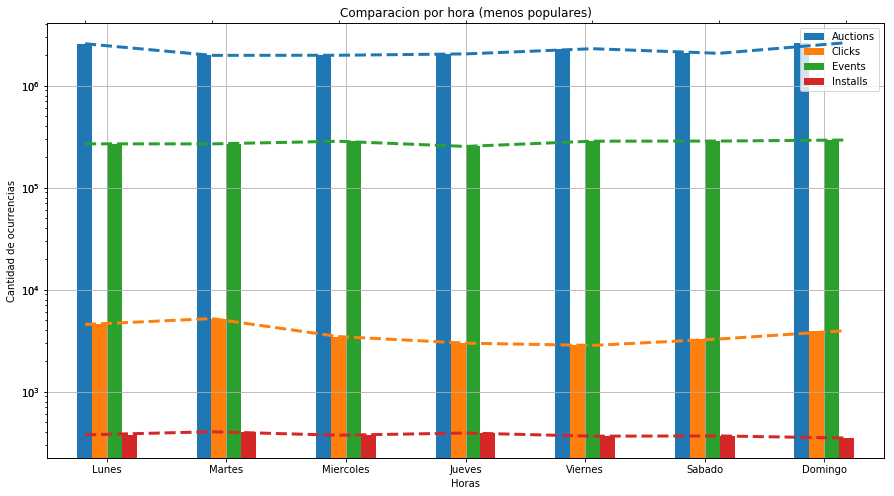

In [173]:
fig, ax = plt.subplots()
ax2 = ax.twiny()
merged4.plot(kind='bar', ax=ax, figsize = (15,8), rot = 0, title = 'Comparacion por hora (menos populares)', grid =True)
merged4.plot(kind='line',ax=ax2,linewidth = 3, style = '--', legend = False)
#ax2.xaxis.get_major_formatter().set_useOffset(False)
ax2.set_xticklabels([])
ax2.set_xlabel('')
ax.set_yscale('log')
ax.set_xlabel('Horas')
ax.set_ylabel('Cantidad de ocurrencias')
ax.legend(["Auctions", "Clicks", "Events", "Installs"])
plt.show()

Como conclusion podemos poner que el dia de la semana no infuye en la cantidad de ocurrencias, informacion que en un principio podría parecer que iba a ser relevante.